# Julia nivel intermedio

Hemos visto varias cosas:

- variables, incluyendo diversos tipos numéricos(`Int64`, `Float64`, `BigFloat`, `Complex{Float64}`, `Rational{Int64}`), cadenas, vectores, matrices

- ciclos (`for`...`end`) y rangos (`a:b`)

- diversas formas de condicionales

- funciones simples

Seguiremos con esto, pero de una manera más sistemática enfatizando conceptos *julianos*.

Una pieza básica del curso se puede resumir en:

> ## Learning by doing

Piénsenlo y, sobre todo, ¡practíquenlo!

## Ejemplo: el método de Newton

Como bien sabemos, el método de Newton es un método iterativo para encontrar los ceros, o raíces, de una ecuación $f(x)=0$. A partir de una aproximación $x_0$, y denotando la derivada de $f(x)$ como $f'(x)$, tenemos:

\begin{equation}
x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)} .
\end{equation}



Para ejemplificar las cosas usaremos la función $f(x) = x^2-2$:

In [1]:
f(x) = x^2 - 2.0

f (generic function with 1 method)

... y su derivada:

In [2]:
f´(x) = 2*x

f´ (generic function with 1 method)

Entonces, el método de Newton vendría dado por la función:

In [3]:
x_0 = 3.0

for i in 1:10
    x_new = x_0 - f(x_0) / f´(x_0)
    println(i, "\t", x_new)
    x_0 = x_new
end

1	1.8333333333333333
2	1.4621212121212122
3	1.4149984298948028
4	1.4142137800471977
5	1.4142135623731118
6	1.414213562373095
7	1.4142135623730951
8	1.414213562373095
9	1.4142135623730951
10	1.414213562373095


In [4]:
sqrt(2.0)

1.4142135623730951

Recordando la clase de cálculo I, el método de Newton sólo converge si $x_0$ es *suficientemente* cercano a la raíz. Veamos qué pasa si *variamos* la condición inicial $x_0$.

In [5]:
initial_guess = -3:0.125:3

-3.0:0.125:3.0

In [6]:
typeof(initial_guess)

FloatRange{Float64}

In [8]:
collect(initial_guess)   # use tab-completion <TAB> for long variable names!

49-element Array{Float64,1}:
 -3.0  
 -2.875
 -2.75 
 -2.625
 -2.5  
 -2.375
 -2.25 
 -2.125
 -2.0  
 -1.875
 -1.75 
 -1.625
 -1.5  
  ⋮    
  1.625
  1.75 
  1.875
  2.0  
  2.125
  2.25 
  2.375
  2.5  
  2.625
  2.75 
  2.875
  3.0  

Defino el arreglo de salida que, entrada por entrada, corresponderá a las condiciones iniciales definidas en `initial_conditions`.

In [7]:
roots = similar(initial_guess)

49-element Array{Float64,1}:
 0.0         
 0.0         
 0.0         
 0.0         
 0.0         
 0.0         
 0.0         
 6.94602e-310
 6.94602e-310
 6.94602e-310
 6.94602e-310
 6.94602e-310
 6.94602e-310
 ⋮           
 6.94602e-310
 6.94602e-310
 6.94602e-310
 6.94602e-310
 6.94602e-310
 6.94602e-310
 6.94602e-310
 6.94602e-310
 6.94602e-310
 0.0         
 0.0         
 0.0         

El número de datos de `initial_guess` es precisamente 49:

In [8]:
length(initial_guess)

49

Ahora, implementamos todo junto; abajo, `enumerate(initial_conditions)` regresa una *tupla* con un enetero, que es el índice de la condición inicial (`j`), y su valor (`x_0`)

In [9]:
for (j, x_0) in enumerate(initial_guess)
    x = x_0

    # 100 iterates of Newton's method
    for i in 1:100
        x = x - f(x) / f´(x)
    end
    
    roots[j] = x
end

Veamos los resultados:

In [10]:
showall(roots)

[-1.414213562373095,-1.4142135623730951,-1.4142135623730951,-1.414213562373095,-1.4142135623730951,-1.4142135623730951,-1.414213562373095,-1.414213562373095,-1.414213562373095,-1.4142135623730951,-1.4142135623730951,-1.4142135623730951,-1.4142135623730951,-1.4142135623730951,-1.4142135623730951,-1.4142135623730951,-1.414213562373095,-1.4142135623730951,-1.414213562373095,-1.4142135623730951,-1.4142135623730951,-1.4142135623730951,-1.414213562373095,-1.4142135623730951,NaN,1.4142135623730951,1.414213562373095,1.4142135623730951,1.4142135623730951,1.4142135623730951,1.414213562373095,1.4142135623730951,1.414213562373095,1.4142135623730951,1.4142135623730951,1.4142135623730951,1.4142135623730951,1.4142135623730951,1.4142135623730951,1.4142135623730951,1.414213562373095,1.414213562373095,1.414213562373095,1.4142135623730951,1.4142135623730951,1.414213562373095,1.4142135623730951,1.4142135623730951,1.414213562373095]

**Pregunta:** ¿Por qué hay un `NaN`?

** Respuesta: ** Porque evaluó la derivada en cero para este caso $f'(0) = 0$--> `f(x)/0 = NaN`

Ahora vamos a visualizar esto. Para eso usaremos el paquete "PyPlot", que es una interface para usar "matplotlb".

Para instalarlo es necesario usar el siguiente comando:
```julia
    Pkg.add("PyPlot")
```

Otros paquetes *registrados* se pueden encontrar [aquí](http://pkg.julialang.org/).

Para empezar a usar un paquete, en este caso "PyPlot" usamos el comando:

```julia
    using PyPlot
```

(Puede tardar un poco la primera vez que se utiliza.)

In [11]:
using PyPlot

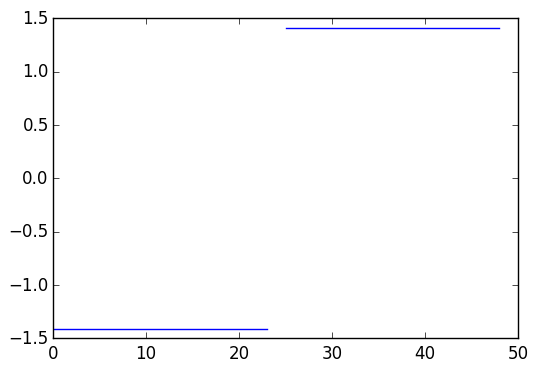

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fdd4ab65780>

In [12]:
figure(figsize=(6,4)) # este comando define el tamaño de la figura
plot(roots)  # este pinta las componentes "y" (`roots`); en "x" se utiliza el índice del vector

## Rendimiento

Ahora, algo **muy** importante en julia, es que el alto rendimiento se da cuando uno hace el trabajo dentro de funciones, y **no** en el *global scope*.

Así que lo anterior, lo empacamos dentro de una función.

In [13]:
"""
This function computes the roots of `f(x)` (which must be defined before) for different initial 
iterates in the range [-20,20], and returns them packed in a vector.
"""
function compute_roots()
    initial_conditions = -20:0.125:20
    roots = similar(initial_conditions)

    for (j, x_0) in enumerate(initial_conditions)
        x = x_0

        # 100 iterations of Newton's method
        for i in 1:100
            x = x - f(x) / f´(x)
        end

        roots[j] = x
    end
    
    roots
end

compute_roots (generic function with 1 method)

Noten la salida de la definición de la función `compute_roots`:

```
    compute_roots (generic function with 1 method)
```

A esto volveremos más adelante...

In [14]:
?compute_roots

search: 

This function computes the roots of `f(x)` (which must be defined before) for different initial  iterates in the range [-20,20], and returns them packed in a vector.


compute_roots



In [15]:
# ";" quita la salida
roots = compute_roots();

¿Cuánto tiempo tardó esto?

El *macro* `@time` permite precisamente medir el tiempo de ejecución.

Julia *compila* cada función la primera vez que es utilizada. Es por eso que conviene compilar `@time`, y luego la ejecución de `@time` con la función que nos interesa medir. Así, para medir fehacientemente el tiempo de ejecución, es importante no incluir en esa medición la compilación de la función.

In [16]:
@time 1;

  0.000003 seconds (148 allocations: 10.151 KB)


In [17]:
@time 1;

  0.000001 seconds (3 allocations: 144 bytes)


Las dos ejecuciones anteriores muestran que, al compilar (primer ejecución), julia utiliza espacio de memoria; una vez compiladas las cosas, el uso de memoria disminuye de manera importante. Incidentalmente, el uso exagerado de memoria muestra que las cosas pueden ser hechas de mejor manera...

In [18]:
@time compute_roots();

  0.000358 seconds (6 allocations: 2.766 KB)


In [19]:
@time compute_roots();

  0.000952 seconds (6 allocations: 2.766 KB)


**Ejercicio 4:** ¿Qué conviene más, usar un ciclo `for... end` o un ciclo `while... end` en la función `compute_roots()`, respecto al for más interno?

Usaremos la función `compute_roots()` para calcular las raíces empleando un ciclo `for`, para el ciclo `while` se implementará la función `compute_roots2()`

In [20]:
"""
This function computes the roots of `f(x)` (which must be defined before) for different initial 
iterates in the range [-20,20] using a while in the innermost loop, and returns them packed in a vector.
"""
function compute_roots2()
    initial_conditions = -20:0.125:20
    roots = similar(initial_conditions)
        for (j, x_0) in enumerate(initial_conditions)
            x = x_0
    
            # 100 iterations of Newton's method\n",
            i = 1
            while i <101
                x = x - f(x) / f´(x)
                i += 1
            end
    
            roots[j] = x
        end
        roots
end

compute_roots2 (generic function with 1 method)

In [21]:
@time compute_roots2();

  0.019109 seconds (5.61 k allocations: 272.411 KB)


In [22]:
@time compute_roots2();

  0.000594 seconds (6 allocations: 2.766 KB)


** Respuesta: ** Evidentemente es más rápido implementar la función `compute_roots()` empleando un `while` pues hay un orden de magnitud de tiempo de diferencia. 

## Funciones genéricas

Lo que hemos hecho hasta ahora está bien, pero *no* es muy genérico, en el sentido de que no es muy cómodo la implementación si queremos considerar distintas funciones `f(x)`.

Para esto, *definimos* el siguiente *método* para la función `compute_roots`:

In [23]:
function compute_roots(f, f´)
    initial_conditions = -20:0.125:20
    roots = similar(initial_conditions)

    for (j, x_0) in enumerate(initial_conditions)
        x = x_0

        # 100 iterations of Newton's method
        for i in 1:100
            x = x - f(x) / f´(x)
        end

        roots[j] = x
    end
    
    roots
end

compute_roots (generic function with 2 methods)

Es importante notar que, ahora, tenemos 2 métodos definidos para la *misma* función `compute_roots`. Esto es, **no** hemos sobreescrito la función `compute_roots`, sino que hemos creado un nuevo método. 

Los métodos se distinguen por el tipo de argumentos de la función: en un caso *no* hay ningún argumento, mientras que en el otro hay dos argumentos.

La instrucción `methods` ayuda a saber cuántos métodos hay asociados a una función, incluyendo información sobre el tipo de los parámetros; esto último es la "signatura de tipo" (*type signature*).

In [24]:
methods(compute_roots)

# 2 methods for generic function "compute_roots":
compute_roots() at In[13]:6
compute_roots(f, f´) at In[23]:2

**Ejercicio 5:** ¿De qué tipo son las variables f y f´?

In [25]:
typeof(f)

Function

In [26]:
typeof(f')

Function

**Respuesta:** ¡Son funciones!

Ejecutamos ahora la nueva implementación de las funciones:

In [27]:
@time compute_roots(f, f´);

  0.021125 seconds (137.68 k allocations: 2.352 MB)


In [28]:
@time compute_roots(f, f´);

  0.005407 seconds (129.05 k allocations: 1.972 MB)


Vale la pena notar que, la vieja implementación es más rápida que la nueva, incluyendo un mejor uso de la memoria. Esto se debe a que julia *no* sabe cómo inferir el resultado de $f$ y $f'$. 

La manera de notar que `compute_roots(f,f´)` va a dar problemas (sobreuso de memoria) se obtiene usando el macro `@code_warntype`; este macro da información sobre la inferencia de tipos que puede hacer el compilador. En las siguientes dos ejecuciones, vale la pena *notar* en el apartado de variables que la variable `x` en un caso es un `Complex{Float64}` y en el otro es `Any`, respectivamente para `compute_roots()` y `compute_roots(f,f´)`; obtener `Any` es *mala señal*:

In [29]:
@code_warntype(compute_roots())

Variables:
  initial_conditions::FloatRange{Float64}
  roots::Array{Float64,1}
  #s41::Tuple{Int64,Int64}
  j::Int64
  x_0::Float64
  #s40::Int64
  x::Float64
  #s39::Int64
  i::Int64
  ######xs#7577#7585#8378::Tuple{Float64,Int64}
  ########xs#7576#7578#7586#8379::Tuple{Int64}
  ######xs#7579#7587#8380::Tuple{Float64,Int64}
  ########xs#7576#7580#7588#8381::Tuple{Int64}
  ######xs#7581#7589#8382::Tuple{Float64,Int64}
  ########xs#7576#7582#7590#8383::Tuple{Int64}
  ##n#8384::Tuple{Float64,Int64}

Body:
  begin  # In[13], line 6:
      initial_conditions = (Base.colon)((Base.box)(Float64,(Base.sitofp)(Float64,-20)),0.125,(Base.box)(Float64,(Base.sitofp)(Float64,20)))::FloatRange{Float64} # In[13], line 7:
      roots = (top(ccall))(:jl_new_array,(top(apply_type))(Base.Array,Float64,1)::Type{Array{Float64,1}},(top(svec))(Base.Any,Base.Any)::SimpleVector,Array{Float64,1},0,(top(tuple))((Base.box)(Int64,(Base.checked_fptosi)(Int64,(top(getfield))(initial_conditions::FloatRange{Float64},:l

In [30]:
@code_warntype(compute_roots(f, f´))

Variables:
  f::F
  f´::F
  initial_conditions::FloatRange{Float64}
  roots::Array{Float64,1}
  #s41::Tuple{Int64,Int64}
  j::Int64
  x_0::Float64
  #s40::Int64
  x::ANY
  #s39::Int64
  i::Int64
  ######xs#7577#7585#8486::Tuple{Float64,Int64}
  ########xs#7576#7578#7586#8487::Tuple{Int64}
  ######xs#7579#7587#8488::Tuple{Float64,Int64}
  ########xs#7576#7580#7588#8489::Tuple{Int64}
  ######xs#7581#7589#8490::Tuple{Float64,Int64}
  ########xs#7576#7582#7590#8491::Tuple{Int64}
  ##n#8492::Tuple{Float64,Int64}

Body:
  begin  # In[23], line 2:
      initial_conditions = (Base.colon)((Base.box)(Float64,(Base.sitofp)(Float64,-20)),0.125,(Base.box)(Float64,(Base.sitofp)(Float64,20)))::FloatRange{Float64} # In[23], line 3:
      roots = (top(ccall))(:jl_new_array,(top(apply_type))(Base.Array,Float64,1)::Type{Array{Float64,1}},(top(svec))(Base.Any,Base.Any)::SimpleVector,Array{Float64,1},0,(top(tuple))((Base.box)(Int64,(Base.checked_fptosi)(Int64,(top(getfield))(initial_conditions::FloatRange{

En Julia hay otro manera de definir y usar funciones: las funciones anónimas. Por ejemplo:

In [31]:
@time compute_roots(x->x^2-2, x->2x);

  0.013319 seconds (161.23 k allocations: 2.467 MB)


In [32]:
@time compute_roots(x->x^2-2, x->2x);

  0.010976 seconds (161.19 k allocations: 2.464 MB)


En este momento (versión 0.4 de julia), las funciones anónimas son aún lentas, pero se pueden hacer trucos para que funcionen mejor. Nuevamente, esto tiene que ver con el hecho de que julia no sabe el tipo de resultado de las funciones anónimas, en el momento de compilar la función.

Hagamos otro ejemplo un poco más interesante:

In [33]:
@time roots = compute_roots( x -> (x-1)*(x-2)*(x-3), x->3x^2-12x+11);

  0.047368 seconds (354.64 k allocations: 5.444 MB, 17.99% gc time)


In [45]:
@time roots = compute_roots( x -> (x-1)*(x-2)*(x-3), x->3x^2-12x+11);

  0.027668 seconds (353.80 k allocations: 5.404 MB)


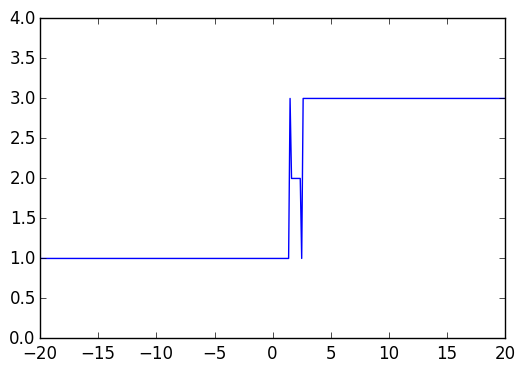

(0,4)

In [34]:
figure(figsize=(6,4))
plot(-20:0.125:20, roots)
ylim(0,4)

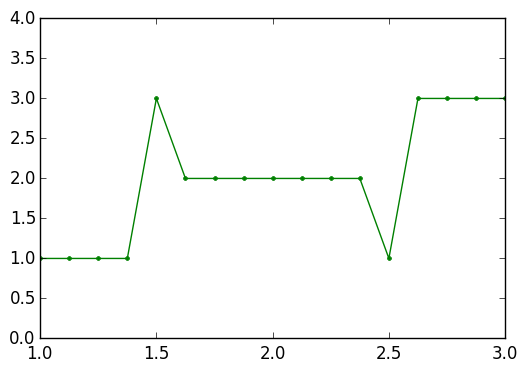

(1,3)

In [35]:
figure(figsize=(6,4))
plot(-20:0.125:20, roots, "g.-")
ylim(0,4)
xlim(1,3)

## El método de Newton sobre los complejos

Ahora, implementaremos el método de Newton, para alguna función modelo ($f(z) = z^3-1$), pero usaremos condiciones iniciales en los complejos.

Las condiciones iniciales, igual que antes, las definiremos a partir de un `FloatRange{Float64}`, que usaremos tanto para la parte real como para la parte imaginaria de $z_0$.

A priori podríamos proceder como antes. Sin embargo, hay *sutilezas*, ya que la salida `roots` no será un vector, sino una matriz.

In [36]:
f(z) = z^3-one(z)
f´(z) = 3*z^2

f´ (generic function with 1 method)

**NOTA**: La siguiente función necesita las funciones $f$ y $f'$, lo que permite usarlas en contextos más generales. Esto, como vimos antes, tiene una penalización en la ejecución.

In [37]:
function compute_complex_roots1(f, f´, range=-5.0:0.125:5.0)  # default value

    L = length(range)
    
    #### VER EL EJERCICIO 6: Dos opciones para *declarar* `roots`:
    ## Uno: definir la matriz, y tener todos los elementos inicialmente en cero
    roots = zeros(Complex128, L, L)  # set a matrix of appropriate length to zero
    ## Dos: definir *el tipo y dimensiones* de la matriz
    # roots = Array(Complex128, L, L)

    for (j, x) in enumerate(range)
        for (i, y) in enumerate(range)
            
            z = x + y*im
            
            for k in 1:1000
                z = z - f(z) / f´(z)
            end
            
            roots[i,j] = z
            
        end
    end
    
    roots
end

compute_complex_roots1 (generic function with 2 methods)

In [38]:
function compute_complex_roots2(f, f´, range=-5.0:0.125:5.0)  # default value

    L = length(range)
    
    #### VER EL EJERCICIO 6: Dos opciones para *declarar* `roots`:
    ## Uno: definir la matriz, y tener todos los elementos inicialmente en cero
    #roots = zeros(Complex128, L, L)  # set a matrix of appropriate length to zero
    ## Dos: definir *el tipo y dimensiones* de la matriz
    roots = Array(Complex128, L, L)

    for (j, x) in enumerate(range)
        for (i, y) in enumerate(range)
            
            z = x + y*im
            
            for k in 1:1000
                z = z - f(z) / f´(z)
            end
            
            roots[i,j] = z
            
        end
    end
    
    roots
end

compute_complex_roots2 (generic function with 2 methods)

In [39]:
function compute_complex_roots3(f, f´, range=-5.0:0.125:5.0)  # default value

    L = length(range)
    
    #### VER EL EJERCICIO 6: Dos opciones para *declarar* `roots`:
    ## Uno: definir la matriz, y tener todos los elementos inicialmente en cero
    roots = zeros(Complex128, L, L)  # set a matrix of appropriate length to zero
    ## Dos: definir *el tipo y dimensiones* de la matriz
    # roots = Array(Complex128, L, L)

    for (i, x) in enumerate(range)
        for (j, y) in enumerate(range)
            
            z = x + y*im
            
            for k in 1:1000
                z = z - f(z) / f´(z)
            end
            
            roots[i,j] = z
            
        end
    end
    
    roots
end

compute_complex_roots3 (generic function with 2 methods)

In [40]:
function compute_complex_roots4(f, f´, range=-5.0:0.125:5.0)  # default value

    L = length(range)
    
    #### VER EL EJERCICIO 6: Dos opciones para *declarar* `roots`:
    ## Uno: definir la matriz, y tener todos los elementos inicialmente en cero
    #roots = zeros(Complex128, L, L)  # set a matrix of appropriate length to zero
    ## Dos: definir *el tipo y dimensiones* de la matriz
    roots = Array(Complex128, L, L)

    for (i, x) in enumerate(range)
        for (j, y) in enumerate(range)
            
            z = x + y*im
            
            for k in 1:1000
                z = z - f(z) / f´(z)
            end
            
            roots[i,j] = z
            
        end
    end
    
    roots
end

compute_complex_roots4 (generic function with 2 methods)

In [41]:
#Método 1: Usando la función zeros e índice rápido en el ciclo más externo
@time compute_complex_roots1(f, f´, -5.0:1.0:5.0);

  0.088319 seconds (576.55 k allocations: 18.806 MB, 7.24% gc time)


In [64]:
@time croots = compute_complex_roots1(f, f´, -5:0.01:5);

132.271549 seconds (4.01 G allocations: 119.522 GB, 14.50% gc time)


In [54]:
#Método 2: Usando la función Array e índice rápido en el ciclo más externo
@time compute_complex_roots2(f, f´, -5.0:1.0:5.0);

  0.015267 seconds (484.25 k allocations: 14.780 MB)


In [61]:
@time croots2 = compute_complex_roots2(f, f´, -5.0:0.01:5.0);

118.129807 seconds (4.01 G allocations: 119.522 GB, 14.73% gc time)


In [58]:
#Método 3: Usando la función zeros e índice rápido en el ciclo más interno
@time compute_complex_roots3(f, f´, -5.0:1.0:5.0);

  0.038439 seconds (484.25 k allocations: 14.780 MB, 14.64% gc time)


In [62]:
@time croots3 = compute_complex_roots3(f, f´, -5.0:0.01:5.0);

118.230404 seconds (4.01 G allocations: 119.522 GB, 14.54% gc time)


In [51]:
#Método 4: Usando la función Array e índice rápido en el ciclo más interno
@time compute_complex_roots4(f, f´, -5.0:1.0:5.0);

  0.031802 seconds (499.90 k allocations: 15.465 MB, 10.86% gc time)


In [63]:
@time croots = compute_complex_roots4(f, f´, -5.0:0.01:5.0);

122.300960 seconds (4.01 G allocations: 119.522 GB, 14.55% gc time)


**Ejercicio 6:** Encuentren la implementación más rápida de `compute_complex_roots` considerando:
- Las dos opciones para definir inicialmente `roots`
- Los índices (i,j) que aparecen en el doble ciclo, respecto a su orden en `roots`

Entre las posibles implementaciones, ¿cuál es la diferencia en el tiempo (o el cociente) entre la implementación más rápida y la más lenta?

¿Por qué `compute_complex_roots` tiene 2 métodos definidos?

Emplearemos las funciones `compute_complex_rootsn()` $n\in{1,2,3,4}$ para usar cada combinación en el uso de `Array` o `zeros` para la creación del arreglo en donde se guardarán los datos y cambio los índices internos.

**Respuesta:** Al parecer el método más efectivo resultó ser el 2, es decir, emplear la función `Array` para crear el arreglo y empleando el índice rápido en el loop más externo (corriendo por columnas).
    
`compute_complex_roots` tiene dos métodos porque tiene definido un valor de intervalo por default (esto genera un método), pero puede indicarse si se quiere trabajar en otro intervalo (generando el segundo método)

Visualicemos los resultados: para esto usaremos `imshow`, que sirve para visualizar una matriz, y el código de colores lo definiremos a partir de la parte imaginaria de `roots`.

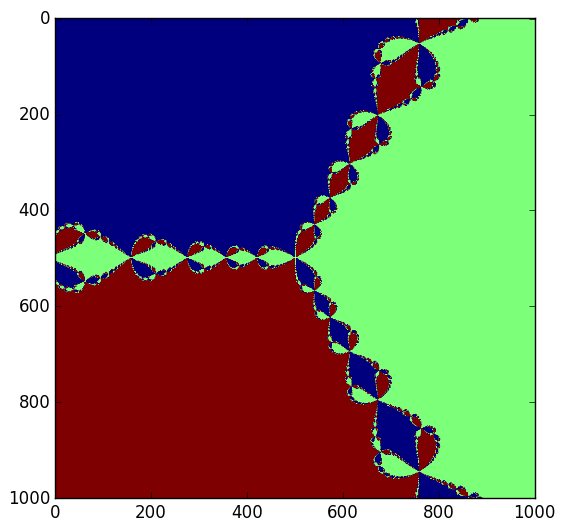

PyObject <matplotlib.image.AxesImage object at 0x7fdd48269358>

In [65]:
imshow(imag(croots))

Juguemos un poco con esto...

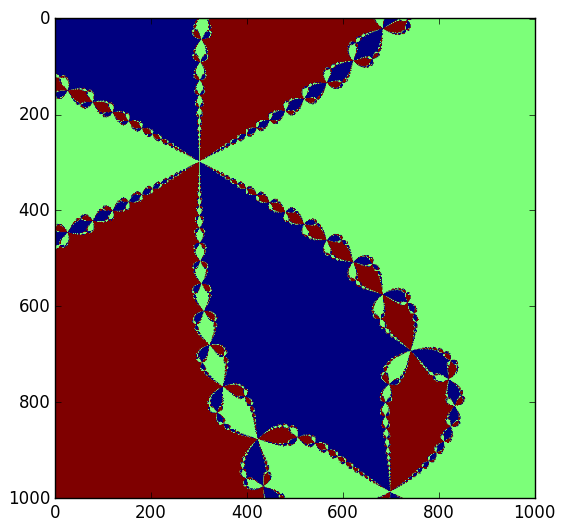

PyObject <matplotlib.image.AxesImage object at 0x7fdd481d85f8>

In [67]:
imshow(imag(compute_complex_roots1(f, f´, -0.3:0.001:0.7)))

## Definición de nuevos tipos

Algo que definitivamente hasta ahora **no** hemos visto es cómo crear nuevos tipos. Esto es algo impresionantemente útil, ya que permite un arreglo compacto (y tal vez eficiente) de los datos que, si es así, se traduce en velocidad.

Como ilustración definiremos un tipo nuevo, `Vector2D`, que permite dar la posición, o velocidad, de una partícula *libre*.

### Los campos de un `type`

Para entender un poco más lo que significa definir un nuevo tipo, consideremos los números complejos:

In [68]:
z0 = complex(3,2) # Esto es *mejor* que z=3+2im

3 + 2im

In [69]:
typeof(ans)

Complex{Int64}

La instrucción `fieldnames` da los campos internos de un tipo; vale la pena notar que el resultado consiste en un vector de *símbolos*. Estos símbolos son los nombres de los campos internos del tipo.

In [70]:
fieldnames(z0)

2-element Array{Symbol,1}:
 :re
 :im

In [71]:
z0.re, z0.im

(3,2)

In [72]:
typeof(ans)

Tuple{Int64,Int64}

### Vectores de tamaño fijo

La sintáxis básica para definir nuevos tipos es:

In [73]:
type Vector2D
    x :: Float64
    y :: Float64
end

En la celda anterior, el doble dos-puntos, `::`, sirve para *anotar* el tipo de las variables internas. Esto es, `Vector2D` constará de dos componentes, `x` y `y`, ambas del tipo `Float64`.

Por **convención** es que las estructuras de tipo empiezan con una *mayúscula*; las funciones empiezan en *minúsculas*.

A estas alturas del partido, sólo hemos definido el tipo `Vector2D`; ¿hemos definido algún método asociado a ésto? O, en otras palabras, ¿cómo creamos algo que sea del tipo `Vector2D`?

In [74]:
methods(Vector2D)

4-element Array{Any,1}:
 call(::Type{Vector2D}, x::Float64, y::Float64) at In[73]:2
 call(::Type{Vector2D}, x, y) at In[73]:2                  
 call{T}(::Type{T}, arg) at essentials.jl:56               
 call{T}(::Type{T}, args...) at essentials.jl:57           

Usando el resultado de `methods`, probamos con la función `call`:

In [75]:
call(Vector2D, 1.0, 2.0)

Vector2D(1.0,2.0)

In [76]:
call(Vector2D, 1, 2)

Vector2D(1.0,2.0)

In [77]:
call(Vector2D, (1, 2)...) # "..." es el 'splat' operator

Vector2D(1.0,2.0)

La función `call` de hecho es la forma genérica de crear cualquier tipo; uno puede usar la forma *concreta*:

In [78]:
x = Vector2D(1, 4)

Vector2D(1.0,4.0)

In [79]:
y = Vector2D(5, 6)

Vector2D(5.0,6.0)

In [80]:
fieldnames(Vector2D)

2-element Array{Symbol,1}:
 :x
 :y

In [81]:
x.x

1.0

Vale la pena notar que uno puede modificar los campos internos de un tipo:

In [82]:
x.x = 3

3.0

In [83]:
x

Vector2D(3.0,4.0)

Pensando que estas cantidades son vectores desplazamiento, o velocidades, quisiéramos sumarlos. Problemos que obtenemos...

In [84]:
x + y

LoadError: LoadError: MethodError: `+` has no method matching +(::Vector2D, ::Vector2D)
Closest candidates are:
  +(::Any, ::Any, !Matched::Any, !Matched::Any...)
while loading In[84], in expression starting on line 1

Julia nos da un error ya que *no* está definida la función `+` para los argumentos de tipo `Vector2D`; el mensaje de la primer línea es perfectamente claro.

Entonces, cómo *no* está definido, y nos interesa usarlo, podemos simplemente definirlo.

In [85]:
+(a::Vector2D, b::Vector2D) = Vector2D(a.x+b.x, a.y+b.y)

+ (generic function with 175 methods)

(En un momento explicaremos el mensajo y cómo hacer las cosas bien.)

In [86]:
x + y

Vector2D(8.0,10.0)

¿Y si queremos definir el producto interno, o sea, la función `dot`?

In [87]:
x ⋅ y # x \cdot<TAB> y

LoadError: LoadError: MethodError: `dot` has no method matching dot(::Vector2D, ::Vector2D)
while loading In[87], in expression starting on line 1

Entonces, tratamos de proceder de igualmanera

In [88]:
dot(a::Vector2D, b::Vector2D) = a.x*b.x + a.y*b.y

dot (generic function with 1 method)

In [89]:
x ⋅ y

LoadError: LoadError: MethodError: `dot` has no method matching dot(::Vector2D, ::Vector2D)
while loading In[89], in expression starting on line 1

In [90]:
methods(Base.dot)

# 5 methods for generic function "dot":
dot(x::Number, y::Number) at linalg/generic.jl:291
dot{T<:Union{Float32,Float64},TI<:Integer}(x::Array{T<:Union{Float32,Float64},1}, rx::Union{Range{TI<:Integer},UnitRange{TI<:Integer}}, y::Array{T<:Union{Float32,Float64},1}, ry::Union{Range{TI<:Integer},UnitRange{TI<:Integer}}) at linalg/matmul.jl:50
dot{T<:Union{Complex{Float32},Complex{Float64}},TI<:Integer}(x::Array{T<:Union{Complex{Float32},Complex{Float64}},1}, rx::Union{Range{TI<:Integer},UnitRange{TI<:Integer}}, y::Array{T<:Union{Complex{Float32},Complex{Float64}},1}, ry::Union{Range{TI<:Integer},UnitRange{TI<:Integer}}) at linalg/matmul.jl:63
dot(x::BitArray{1}, y::BitArray{1}) at linalg/bitarray.jl:5
dot(x::AbstractArray{T,1}, y::AbstractArray{T,1}) at linalg/generic.jl:292

Julia simplemente **no** nos permite si quiera definir esta función.

La manera de proceder aquí es, extendiendo los métodos de `dot` al caso que nos interesa. Sin embargo, debemos *explícitamente* importar la función que será extendida. 

Una manera de hacer esto es:

In [91]:
Base.dot(a::Vector2D, b::Vector2D) = a.x*b.x + a.y*b.y

dot (generic function with 6 methods)

In [92]:
x ⋅ y

39.0

Esto está relacionado con el mensaje que apareció al definir `+(a::Vector2D, b::Vector2D)`. Lo correcto hubiera sido definirla usando:

```julia
Base.+(a::Vector2D, b::Vector2D)
```

Una manera alternativa, que a veces es más conveniente, es usando el comando

```julia
import Base.dot
```

cosa que debe ejecutarse *antes* de definir `dot`. Para ilustrar esto debemos *limpiar* el espacio de nombres en la sesión actual. Esto lo hacemos con `workspace()`, lo que casi equivale a resetear la sesión.

In [93]:
workspace()

In [94]:
x

LoadError: LoadError: UndefVarError: x not defined
while loading In[94], in expression starting on line 1

In [95]:
dot

dot (generic function with 6 methods)

In [96]:
Vector2D

LoadError: LoadError: UndefVarError: Vector2D not defined
while loading In[96], in expression starting on line 1

In [97]:
type Vector2D
    x :: Float64
    y :: Float64
end

In [98]:
import Base: +, dot

In [99]:
+(a::Vector2D, b::Vector2D) = Vector2D(a.x+b.x, a.y+b.y)

+ (generic function with 176 methods)

In [100]:
dot(a::Vector2D, b::Vector2D) = a.x*b.x + a.y+b.y

dot (generic function with 7 methods)

In [101]:
methods(dot)

# 7 methods for generic function "dot":
dot(x::Number, y::Number) at linalg/generic.jl:291
dot{T<:Union{Float32,Float64},TI<:Integer}(x::Array{T<:Union{Float32,Float64},1}, rx::Union{Range{TI<:Integer},UnitRange{TI<:Integer}}, y::Array{T<:Union{Float32,Float64},1}, ry::Union{Range{TI<:Integer},UnitRange{TI<:Integer}}) at linalg/matmul.jl:50
dot{T<:Union{Complex{Float32},Complex{Float64}},TI<:Integer}(x::Array{T<:Union{Complex{Float32},Complex{Float64}},1}, rx::Union{Range{TI<:Integer},UnitRange{TI<:Integer}}, y::Array{T<:Union{Complex{Float32},Complex{Float64}},1}, ry::Union{Range{TI<:Integer},UnitRange{TI<:Integer}}) at linalg/matmul.jl:63
dot(x::BitArray{1}, y::BitArray{1}) at linalg/bitarray.jl:5
dot(x::AbstractArray{T,1}, y::AbstractArray{T,1}) at linalg/generic.jl:292
dot(a::LastMain.Vector2D, b::LastMain.Vector2D) at In[91]:1
dot(a::Vector2D, b::Vector2D) at In[100]:1

In [102]:
x = Vector2D(3, 4)
y = Vector2D(5, 6)

Vector2D(5.0,6.0)

Para saber qué método utilizó cierta ejecución de algún código, por ejemplo, `Vector2D(3, 4)`, utilizo el macro `@which`:

In [103]:
@which Vector2D(3, 4)

call(::Type{Vector2D}, x, y) at In[97]:2

In [104]:
x + y

Vector2D(8.0,10.0)

In [105]:
x ⋅ y

25.0

### Tipos parametrizados

Hay situaciones en que nos interesa definir un nuevo tipo para distintos tipos de signatura de los parámetros internos. Un ejemplo es `Complex` o `Rational`, pero de hecho también los arreglos son tipos que reconocen la estructura de los elementos internos que los componen:

In [106]:
typeof(complex(1.0,2.0))

Complex{Float64}

In [107]:
typeof(complex(1,2))

Complex{Int64}

In [108]:
typeof([1, 2.1])

Array{Float64,1}

Noten arriba que el entero "1" es *promovido* a Float64 "1.0", que es el tipo del segundo elemento.

In [109]:
workspace()

In [110]:
immutable Vector2D{T}
    x::T
    y::T
end

Arriba, hemos usado `immutable` en lugar de `type`, lo que le permite al compilador guardar (en memoria) a este tipo de estructura de una manera más eficiente. Esto, sin embargo, tiene consecuencias, como es el hecho de que una vez definida una estructura, sus componentes *no* pueden cambiar.

En la definición de `Vector2D`, `T` representa el tipo de la estructura que creamos y *parametriza* a `Vector2D` lo que se indica con `{T}`. Dada esta definición, ambas componentes `x` y `y` son del (mismo) tipo `T`.

In [111]:
x = Vector2D(1,3)

y = Vector2D(2.0,3.5)

println(x)

Vector2D{

In [112]:
x.x = 4

LoadError: LoadError: type Vector2D is immutable
while loading In[112], in expression starting on line 1

El error se debe a que la estructura es inmutable, y que el tipo (`Int64` en este caso) también lo es; existen otras estructuras que *no* son inmutables.

Esto de ser inmutable no es raro: los números son inmutables (sino, uno podría redefinir "2"). 

Todo aquéllo que es mutable puede ser redefinido. Por ejemplo:

In [113]:
v = [1,2]

v[2] = 3

v

2-element Array{Int64,1}:
 1
 3

In [114]:
push!(v,6)

Int64}(1,3)


3-element Array{Int64,1}:
 1
 3
 6

Los vectores (o cualquier tipo de arreglos) son mutables. Las tuplas, en cambio, **no son** mutables; esto permite un manejo más eficiente del objeto en memoria.

In [115]:
tup = (1,2.3)

(1,2.3)

In [116]:
tup[1] = 2

LoadError: LoadError: MethodError: `setindex!` has no method matching setindex!(::Tuple{Int64,Float64}, ::Int64, ::Int64)
while loading In[116], in expression starting on line 1

In [117]:
tup[1]

1

El definir una estructura parametrizada hace que, por default, si los parámetros **no** cumplen la signatura del tipo, haya un error:

In [118]:
Vector2D(1, 2.3)

LoadError: LoadError: MethodError: `convert` has no method matching convert(::Type{Vector2D{T}}, ::Int64, ::Float64)
This may have arisen from a call to the constructor Vector2D{T}(...),
since type constructors fall back to convert methods.
Closest candidates are:
  Vector2D{T}(::T, !Matched::T)
  call{T}(::Type{T}, ::Any)
  convert{T}(::Type{T}, !Matched::T)
while loading In[118], in expression starting on line 1

Noten que la actual definición de `Vector2D{T}` (parametrizada) es *demasiado* flexible, esto es, permite definir ciertos tipos que, quizás, no nos interesa considerar.

In [119]:
Vector2D("Soy", "Luis")

Vector2D{ASCIIString}("Soy","Luis")

Las funciones, de hecho, también pueden ser parametrizadas:

In [120]:
import Base.+
+{T}(a::Vector2D{T}, b::Vector2D{T}) = Vector2D{T}(a.x+b.x, a.y+b.y)

+ (generic function with 177 methods)

Noten arriba que la función, de hecho, está parametrizada, y que el parámetro está relacionado con el parámetros del tipo de los argumentos. 



In [121]:
Vector2D(1,3) + Vector2D(-1,2)

Vector2D{Int64}(0,5)

In [122]:
Vector2D(1,3) + Vector2D("Soy", "Luis")

LoadError: LoadError: MethodError: `+` has no method matching +(::Vector2D{Int64}, ::Vector2D{ASCIIString})
Closest candidates are:
  +(::Any, ::Any, !Matched::Any, !Matched::Any...)
  +{T}(::Vector2D{T}, !Matched::Vector2D{T})
while loading In[122], in expression starting on line 1

In [123]:
Vector2D(1,3) + Vector2D(3.0,1.1)

LoadError: LoadError: MethodError: `+` has no method matching +(::Vector2D{Int64}, ::Vector2D{Float64})
Closest candidates are:
  +(::Any, ::Any, !Matched::Any, !Matched::Any...)
  +{T}(::Vector2D{T}, !Matched::Vector2D{T})
while loading In[123], in expression starting on line 1

Uno, de hecho, podría haber definido la misma operación sin incluir la parte paramétrica; esto tiene consecuencias interesantes. Así, tenemos:

In [124]:
import Base.-
-(a::Vector2D, b::Vector2D) = Vector2D(a.x-b.x, a.y-b.y)

- (generic function with 211 methods)

In [125]:
Vector2D(1,3) - Vector2D(-1,2)

Vector2D{Int64}(2,1)

In [126]:
Vector2D(1,3) - Vector2D(3.0,1.1)

Vector2D{Float64}(-2.0,1.9)

In [127]:
Vector2D(1,3) - Vector2D("Soy", "Luis")

LoadError: LoadError: MethodError: `-` has no method matching -(::Int64, ::ASCIIString)
Closest candidates are:
  -(::Int64)
  -(::Int64, !Matched::Int64)
  -(::Real, !Matched::Complex{Bool})
  ...
while loading In[127], in expression starting on line 1

Gracias a que *no* impusimos que `a` y `b` sean *ambos* `Vector2D{T}`, julia puede restarlos.

### Promotion and convertion

La pregunta es, cómo conseguir que *no* nos de un error la instrucción `Vector2D(1, 3.2)`. La respuesta tiene que ver con definir reglas de conversión y promoción. (En este caso concreto, como veremos abajo, una regla de promoción es suficiente.)

Convertir entre tipos (donde esto tenga sentido) se logra usando `convert`:

In [128]:
convert(Float64, 1//2)

0.5

In [129]:
convert(Array{Float64,1}, [1//2, 1//3])

2-element Array{Float64,1}:
 0.5     
 0.333333

In [130]:
x = convert(Rational{Int128}, 0.5)

1//2

In [131]:
typeof(x)

Rational{Int128}

La operación de conversión debe tener sentido; por ejemplo, ¿qué esperamos que nos de `convert(Int64, 0.6)`?

In [132]:
convert(Int64, 0.6)

LoadError: LoadError: InexactError()
while loading In[132], in expression starting on line 1

In [133]:
methods(convert)

# 635 methods for generic function "convert":
convert(::Type{Tuple{}}, ::Tuple{}) at essentials.jl:61
convert{T<:Tuple{Any,Vararg{Any}}}(::Type{T<:Tuple{Any,Vararg{Any}}}, x::T<:Tuple{Any,Vararg{Any}}) at essentials.jl:98
convert{T<:Tuple{Any,Vararg{Any}}}(::Type{T<:Tuple{Any,Vararg{Any}}}, x::Tuple{Any,Vararg{Any}}) at essentials.jl:96
convert(::Type{Tuple}, x::Tuple) at essentials.jl:62
convert{T}(::Type{Tuple{Vararg{T}}}, x::Tuple) at essentials.jl:63
convert{T<:Union{Int8,UInt8}}(::Type{Cstring}, p::Ptr{T<:Union{Int8,UInt8}}) at c.jl:61
convert(::Type{Cwstring}, p::Ptr{Int32}) at c.jl:62
convert{T<:Union{Int8,UInt8}}(::Type{Ptr{T<:Union{Int8,UInt8}}}, p::Cstring) at c.jl:63
convert(::Type{Ptr{Int32}}, p::Cwstring) at c.jl:64
convert(::Type{Cstring}, s::Symbol) at c.jl:83
convert{T}(::Type{UnitRange{T}}, r::UnitRange{T}) at range.jl:587
convert{T}(::Type{UnitRange{T}}, r::UnitRange{T<:Real}) at range.jl:588
convert{T1,T2}(::Type{StepRange{T1,T2}}, r::StepRange{T1,T2}) at range.jl:592
convert{T}(::Type{StepRange{T,S}}, r::UnitRange{T}) at range.jl:598
convert{T1,T2}(::Type{StepRange{T1,T2}}, r::Range{T}) at range.jl:596
convert{T}(::Type{FloatRange{T}}, r::FloatRange{T}) at range.jl:603
convert{T}(::Type{FloatRange{T}}, r::FloatRange{T<:AbstractFloat}) at range.jl:604
convert{T}(::Type{FloatRange{T<:AbstractFloat}}, r::OrdinalRange{T,S}) at range.jl:611
convert{T}(::Type{FloatRange{T}}, r::OrdinalRange{T,S}) at range.jl:609
convert{T}(::Type{LinSpace{T}}, r::LinSpace{T}) at range.jl:616
convert{T}(::Type{LinSpace{T}}, r::LinSpace{T<:AbstractFloat}) at range.jl:617
convert{T}(::Type{LinSpace{T<:AbstractFloat}}, r::OrdinalRange{T,S}) at range.jl:624
convert{T}(::Type{LinSpace{T}}, r::OrdinalRange{T,S}) at range.jl:622
convert{T}(::Type{LinSpace{T}}, r::FloatRange{T<:AbstractFloat}) at range.jl:630
convert{T}(::Type{LinSpace{T<:AbstractFloat}}, r::FloatRange{T}) at range.jl:632
convert{T}(::Type{Array{T,1}}, r::Range{T}) at range.jl:671
convert(::Type{Bool}, x::Bool) at bool.jl:5
convert(::Type{Bool}, x::Rational{T<:Integer}) at rational.jl:75
convert(::Type{Bool}, x::Float16) at float16.jl:101
convert(::Type{Bool}, x::BigFloat) at mpfr.jl:164
convert{T,f}(::Type{Bool}, x::LastMain.LastMain.FixedPointNumbers.Fixed{T,f}) at /home/daniel/.julia/v0.4/FixedPointNumbers/src/fixed.jl:42
convert(::Type{Bool}, x::LastMain.LastMain.FixedPointNumbers.UFixed{T<:Unsigned,f}) at /home/daniel/.julia/v0.4/FixedPointNumbers/src/ufixed.jl:71
convert(::Type{Bool}, x::Real) at bool.jl:6
convert(::Type{Int8}, x::UInt8) at int.jl:193
convert(::Type{Int8}, x::Int16) at int.jl:172
convert(::Type{Int8}, x::UInt16) at int.jl:170
convert(::Type{Int8}, x::Int32) at int.jl:172
convert(::Type{Int8}, x::UInt32) at int.jl:170
convert(::Type{Int8}, x::Int64) at int.jl:172
convert(::Type{Int8}, x::UInt64) at int.jl:170
convert(::Type{Int8}, x::Int128) at int.jl:172
convert(::Type{Int8}, x::UInt128) at int.jl:170
convert(::Type{Int8}, x::Bool) at int.jl:187
convert(::Type{UInt8}, x::Int8) at int.jl:193
convert(::Type{UInt8}, x::Int16) at int.jl:175
convert(::Type{UInt8}, x::UInt16) at int.jl:175
convert(::Type{UInt8}, x::Int32) at int.jl:175
convert(::Type{UInt8}, x::UInt32) at int.jl:175
convert(::Type{UInt8}, x::Int64) at int.jl:175
convert(::Type{UInt8}, x::UInt64) at int.jl:175
convert(::Type{UInt8}, x::Int128) at int.jl:175
convert(::Type{UInt8}, x::UInt128) at int.jl:175
convert(::Type{UInt8}, x::Bool) at int.jl:187
convert(::Type{Int16}, x::Int8) at int.jl:183
convert(::Type{Int16}, x::UInt8) at int.jl:187
convert(::Type{Int16}, x::UInt16) at int.jl:193
convert(::Type{Int16}, x::Int32) at int.jl:172
convert(::Type{Int16}, x::UInt32) at int.jl:170
convert(::Type{Int16}, x::Int64) at int.jl:172
convert(::Type{Int16}, x::UInt64) at int.jl:170
convert(::Type{Int16}, x::Int128) at int.jl:172
convert(::Type{Int16}, x::UInt128) at int.jl:170
convert(::Type{Int16}, x::Bool) at int.jl:187
convert(::Type{UInt16}, x::Int8) at int.jl:181
convert(::Type{UInt16}, x::U

In [134]:
convert(Int, true)

1

In [135]:
@which convert(Int, true)

convert(::Type{Int64}, x::Bool) at int.jl:187

También, existe la promoción de varios objetos a un tipo común:

In [136]:
tup = promote(1, 1//2, BigInt(2))

(1//1,1//2,2//1)

In [137]:
typeof(tup)

Tuple{Rational{BigInt},Rational{BigInt},Rational{BigInt}}

En julia, hay un árbol jerárquico en la organización de los tipos. Para entender esto veamos dos casos:

In [138]:
? Int64

search: 

No documentation found.

**Summary:**

```julia
immutable Int64 <: Signed
```


Int64 int64 UInt64 uint64 Int16 int16 UInt16 uint16



In [139]:
? Rational

search: 

No documentation found.

**Summary:**

```julia
immutable Rational{T<:Integer} <: Real
```

**Fields:**

```julia
num :: T<:Integer
den :: T<:Integer
```


In [140]:
? Signed

No documentation found.

**Summary:**

```julia
abstract Signed <: Integer
```

**Subtypes:**

```julia
Int128
Int16
Int32
Int64
Int8
```


Rational rationalize Irrational SerializationState permutations

search: Signed signed Unsigned unsigned isassigned is_assigned_char



Esto muestra que hay ciertos tipos *concretos* (como `Int64`, `Float64`) y *otros* que son abstractos; los segundos en algún sentido agrupan varios tipos distintos.

La instrucción `super` permite ver qué tipo está directamente arriba en la estructura del árbol:

In [141]:
super(Float64)

AbstractFloat

In [142]:
super(AbstractFloat)

Real

In [143]:
super(Real)

Number

... y la instrucción subtypes, qué está por debajo:

In [144]:
subtypes(Real)

5-element Array{Any,1}:
 AbstractFloat                                               
 Integer                                                     
 Irrational{sym}                                             
 LastMain.LastMain.FixedPointNumbers.FixedPoint{T<:Integer,f}
 Rational{T<:Integer}                                        

In [145]:
subtypes(Number)

2-element Array{Any,1}:
 Complex{T<:Real}
 Real            

La estructura de árbol tiene un tope *por arriba*, `Any`:

In [146]:
super(Number)

Any

In [147]:
super(Any)

Any

In [148]:
subtypes(Any)

276-element Array{Any,1}:
 AbstractArray{T,N}                        
 AbstractChannel                           
 AbstractRNG                               
 AbstractString                            
 Any                                       
 Associative{K,V}                          
 Base.AbstractCmd                          
 Base.AbstractMsg                          
 Base.AbstractZipIterator                  
 Base.Cartesian.LReplace{S<:AbstractString}
 Base.Combinations{T}                      
 Base.Count{S<:Number}                     
 Base.Cycle{I}                             
 ⋮                                         
 Tuple                                     
 TypeName                                  
 TypeVar                                   
 Type{T}                                   
 UniformScaling{T<:Number}                 
 Val{T}                                    
 Vararg{T}                                 
 Vector2D{T}                               
 Versi

Vale la pena notar que existe, entre varias cosas, el tipo `Void` (antes `Nothing`)

In [149]:
? Void

search: 

No documentation found.

**Summary:**

```julia
immutable Void <: Any
```


Entonces, volviendo al punto de cómo hacer para que `Vector2D{1, 3.2}` funcione, podemos definir un nuevo método, para la creación del tipo `Vector2D`, que involucre una promoción de tipos, de la siguiente manera:

In [150]:
Vector2D(a, b) = Vector2D(promote(a,b)...)

Vector2D{T}

In [151]:
methods(Vector2D)

4-element Array{Any,1}:
 call{T}(::Type{Vector2D{T}}, x::T, y::T) at In[110]:2
 call(::Type{Vector2D{T}}, a, b) at In[150]:1         
 call{T}(::Type{T}, arg) at essentials.jl:56          
 call{T}(::Type{T}, args...) at essentials.jl:57      

In [152]:
Vector2D(1, 3.2)

Vector2D{Float64}(1.0,3.2)

Claro que, esto sólo tendrá sentido cuando la promoción tiene sentido; cuando no la tiene, arrojará un error:

In [153]:
Vector2D("Luis", 3.2)

LoadError: LoadError: StackOverflowError:
while loading In[153], in expression starting on line 1

Por último, uno puede restringir el tipo de parámetros de una estructura, usando la notación ` T <: R` que significa que el parámetro `T` es subtipo de `R`. Un ejemplo es `T <: Real`.

In [154]:
workspace()

Void @vectorize_2arg @vectorize_1arg versioninfo



In [155]:
type Vector2D{T<:Real}
    x :: T
    y :: T
end

Agregamos la promoción de los tipos:

In [156]:
Vector2D(a, b) = Vector2D(promote(a,b)...)

Vector2D{T<:Real}

In [157]:
Vector2D(1, 3.2)

Vector2D{Float64}(1.0,3.2)

In [158]:
Vector2D("Soy", "Luis")

LoadError: LoadError: StackOverflowError:
while loading In[158], in expression starting on line 1

La notación `T <: R` de hecho puede ser utilizada para saber si algo es subtipo de otra cosa:

In [159]:
Int64 <: Real

true

In [160]:
Int64 <: Void

false

In [161]:
Void <: Int64

false

Las dos últimas instrucciones muestran que `Void` e `Int64` pertenecen a dos ramas distintas del árbol jerárquico de tipos; en otras palabras, el tipo superior común entre `Int64` y `Void` es `Any`:

In [162]:
promote_type(Int64, Void)

Any

## Referencias

Parte de este notebook está basado en [Invitation to julia](https://github.com/dpsanders/invitation_to_julia), de [David P. Sanders](https://github.com/dpsanders).